# Ratings Prediction

In [7]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns 
color = sns.color_palette()

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import random

%matplotlib inline

In [4]:
data = pd.read_csv('googleplaystore.csv')# uploads the data in the notebook
x=data #attributes the data also to the value of x for future programming 
data.head(5)#shows the top 5 data rows and all columns in the data grid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.info()# identify intergers and floats in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.shape #shows the number of rows and columns 

(10841, 13)

In [7]:
data.isnull().sum()#identifies which columns have null values and how many there are

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# 
whilst preprocessing and viewing the data we observe that in this Datasets the maximum rating of an app is 19 which is 
#not posible yet, we know that the maximum rating of an app in the google play store is 5.
#so it is possinble to argue that something wrong.

In [10]:
# By viewing this we say that in this row all data are placed wrong by one position, so  
# the data is shifted to the right side and make correct position.

In [11]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [14]:
# Investigating whether the information on the data is not up-to-data

In [15]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

In [17]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


In [18]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [19]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [21]:
d1=x[x['Type']=='Free']
d2=x[x['Type']=='Paid']

In [22]:
col='year_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"app udated or added over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [23]:
col='month_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [24]:
col='month_added'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid", marker=dict())
layout={'title':"Paid App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [25]:
# Acessing whether there is an age bias towards Free apps at the Google Play Store 

In [31]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Comparing the Age Ratings between Free and Paid Apps",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [30]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Age Rating s for Free Apps",'xaxis':{'title':"Contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


In [29]:
col='Content Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Age Ratings for Paid Apps",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [32]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [33]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Rating",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [34]:
col='Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Paid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

# Categories

In [36]:
col='Category'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [37]:
col='Android Ver'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Android Versions"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

# Installations 

In [38]:
col='Installs'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Installed App ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

# Ratings 

In [39]:
d3=x[x['Rating']==4.5]
d4=x[x['Rating']==4]

In [44]:
col='Content Rating'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="pink"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="grey"))
y = [trace1, trace2]
layout={'title':"Rating over the contents",'xaxis':{'title':"Content Rating"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [47]:
col='Category'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="pink"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="grey"))
y = [trace1, trace2]
layout={'title':"Category Specific Ratings"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

# Data Cleaning 

In [48]:
data.isnull().sum().sum()

1487

In [49]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

C:\Users\laura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Total,Percent
Android Ver,2,0.000184
App,0,0.000000
Category,1,0.000092
Content Rating,0,0.000000
Current Ver,8,0.000738
Genres,1,0.000092
Installs,0,0.000000
Last Updated,0,0.000000
Price,0,0.000000
Rating,1474,0.135965


In [50]:
data.dropna(inplace=True)

In [51]:
data.shape

(9360, 15)

In [52]:
# Dummy Variables

In [53]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


In [54]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [55]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [56]:
data.head()

,Rating,Reviews,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,2018,8,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Feature Selection

In [75]:
# drop target variable
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [76]:
# split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [81]:
# Scalling 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Modelling 

In [83]:
# LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.7622863247863247


C:\Users\laura\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



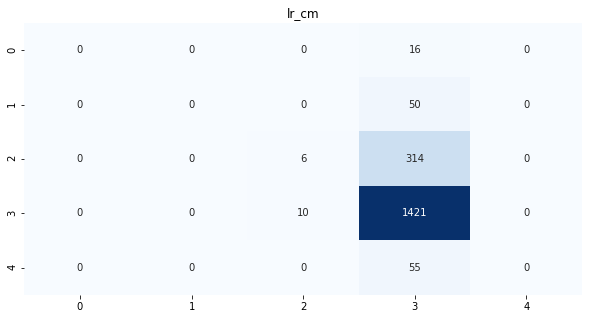

In [84]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [85]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 0.6853632478632479


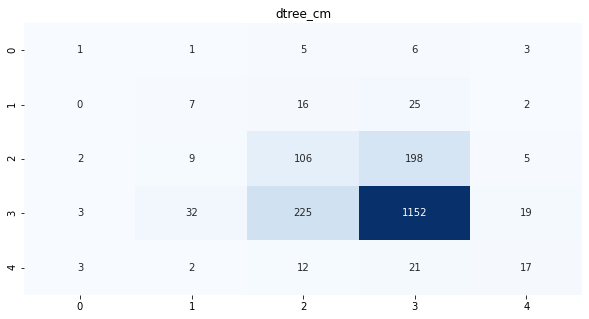

In [87]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

In [88]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

SVM_regressor_accuracy: 0.7649572649572649


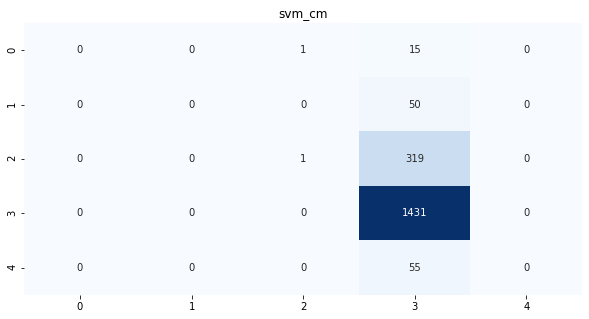

In [90]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

In [91]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 0.7355769230769231


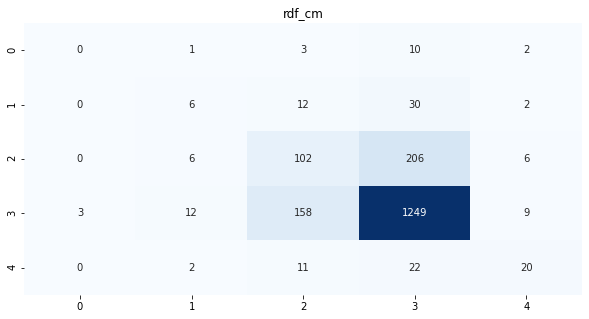

In [92]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

# Comparing Models

Text(0.5, 1.0, 'Model Accuracy')

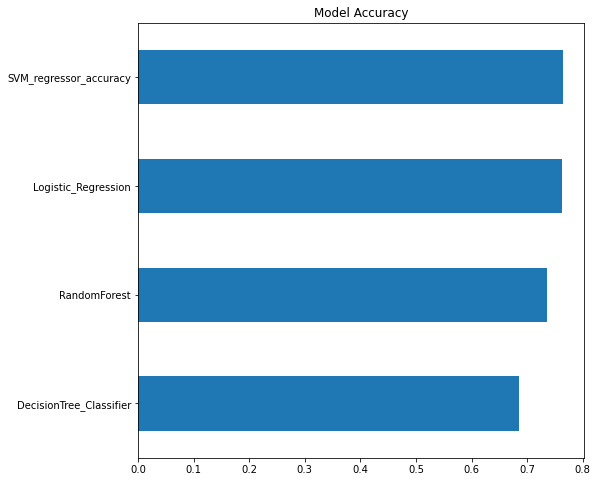

In [103]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')